In [1]:
%matplotlib inline
import numpy as np
import pca
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from SAILnet import SAILmods
import tf_lca
import os
import StimSet
import fitlearners
import utils

In [7]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.figsize'] = (7.5,7.5)
mpl.rcParams['savefig.bbox'] = 'tight'

In [3]:
datafile = 'vh32_256.npy'
numinput = 256
with open('vh32_256PCA.pickle', 'rb') as f:
    impca, origshape = pickle.load(f)
data = np.load(datafile)[:, :numinput]
impca.dim = numinput

def apply_spectrum(data, power=1.0):
    colored = data.dot(np.diag(np.power(impca.sValues[:numinput], power)))
    return colored/colored.std()

numunits = numinput
imnet = SAILmods.VarTimeSAILnet(data=data, nunits=numunits,
              datatype='image',
              pca=impca,
              stimshape=origshape, ninput=numinput)

In [4]:
imlca = tf_lca.LCALearner(data=data, nunits=numunits, pca=impca, stimshape=origshape, lam=0.1,
                        snr_goal=15,
                        learnrate=50.0,
                        infrate=0.1,
                        niter=200,
                        seek_snr_rate=0.0001,
                        threshfunc='soft')

In [5]:
ims_winners = ['Pickles/natims/vh32_256ds0.0scaled1.0SAIL1oc0.1p.pickle',
 'Pickles/natims/vh32_256ds0.125scaled3.16SAIL1oc0.1p.pickle',
 'Pickles/natims/vh32_256ds0.25scaled3.16SAIL1oc0.046p.pickle',
 'Pickles/natims/vh32_256ds0.5scaled10.0SAIL1oc0.046p.pickle',
 'Pickles/natims/vh32_256ds0.75scaled31.6SAIL1oc0.01p.pickle',
 'Pickles/natims/vh32_256ds1.0scaled31.6SAIL1oc0.01p.pickle']

In [14]:
impca.whiten = False
impca.mean_vec = np.zeros_like(impca.mean_vec)

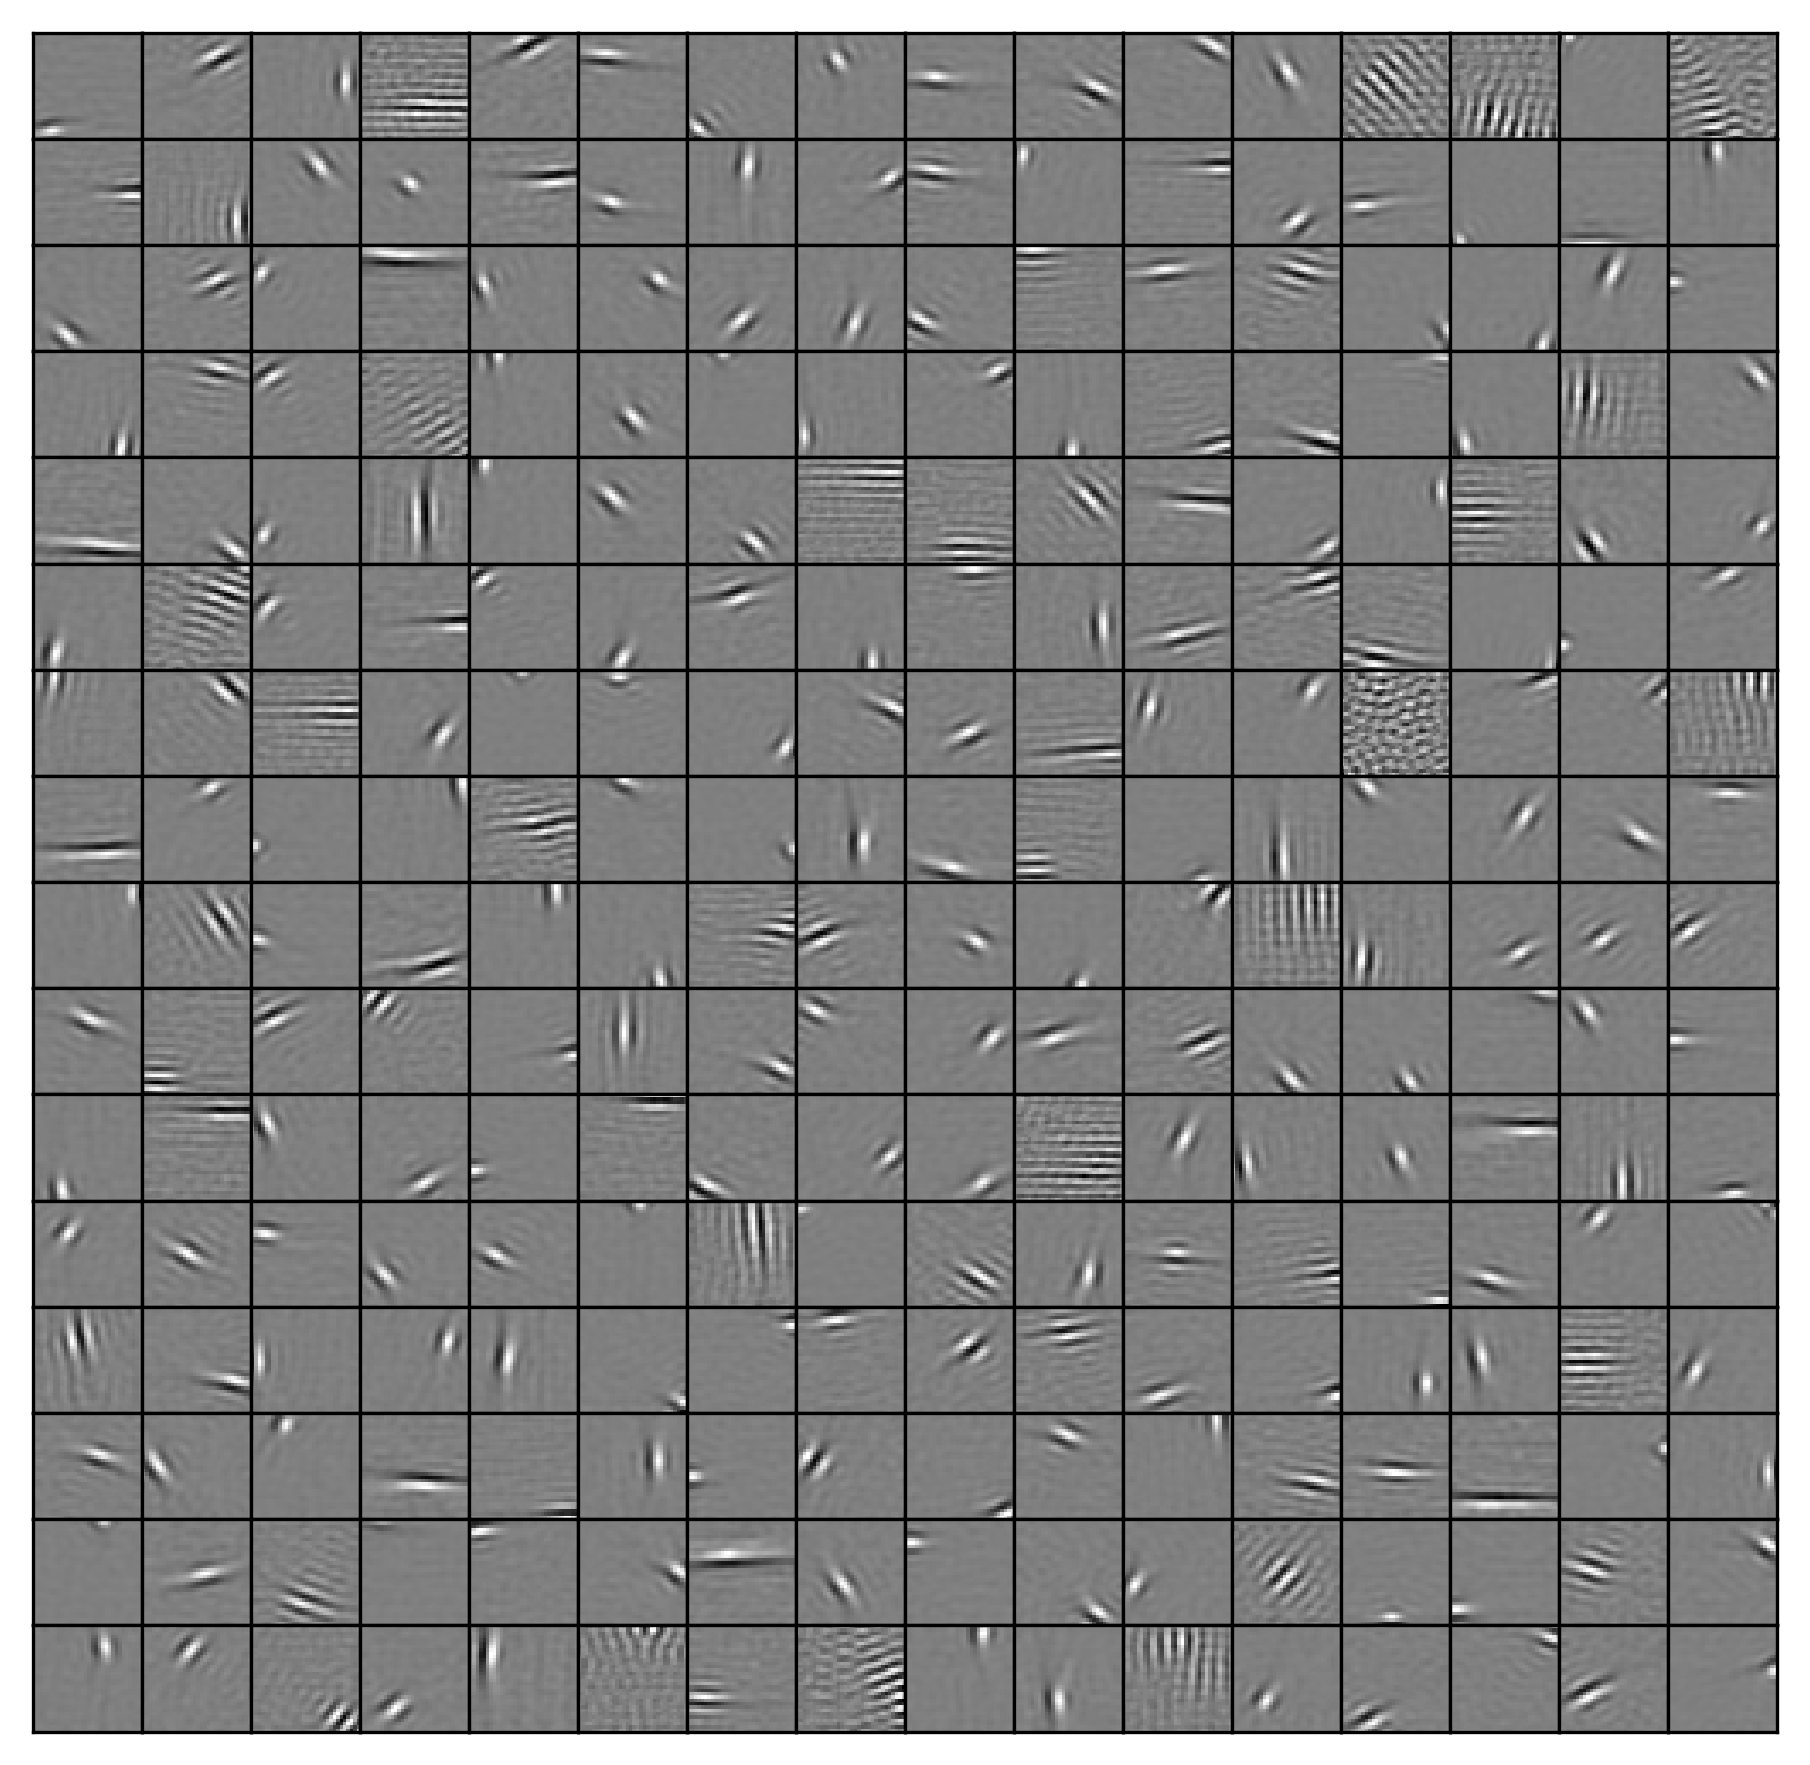

In [15]:
imnet.load(ims_winners[0])
imnet.tiled_dict(cmap='gray', layout=[16,16], savestr='Figures/SAILwhite_fulldict.png')

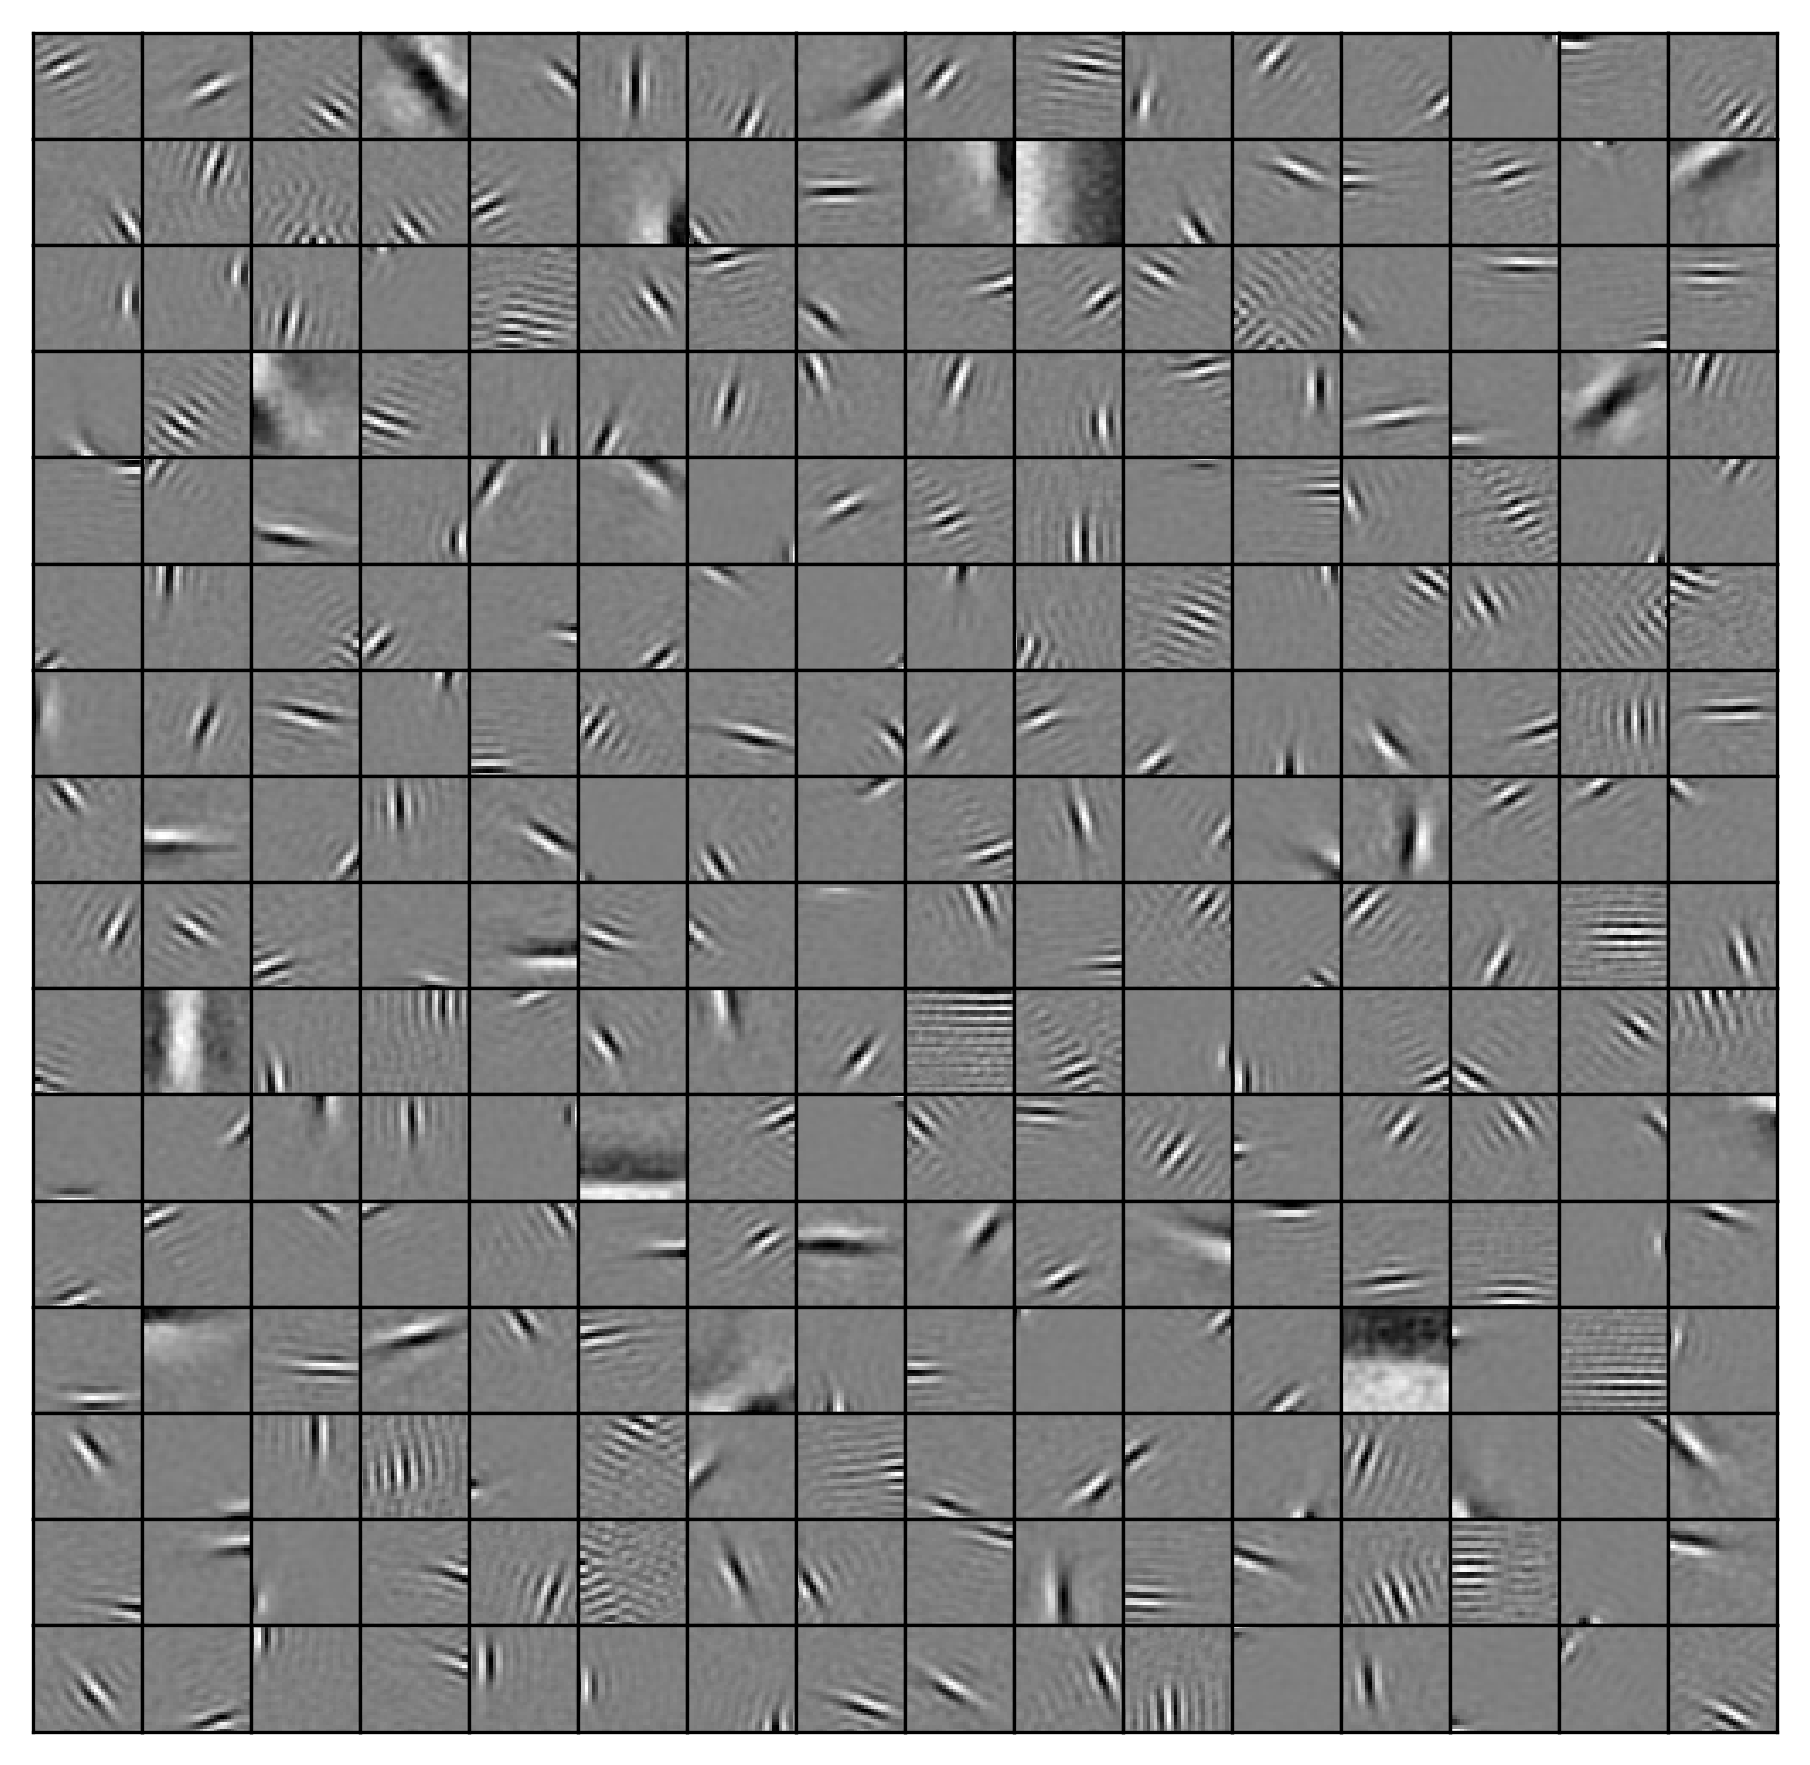

In [16]:
imlca.load('Pickles/conventional/completeLCA_white.pickle')
imlca.tiled_dict(cmap='gray', layout=[16,16], savestr='Figures/lcawhite_fulldict.png')

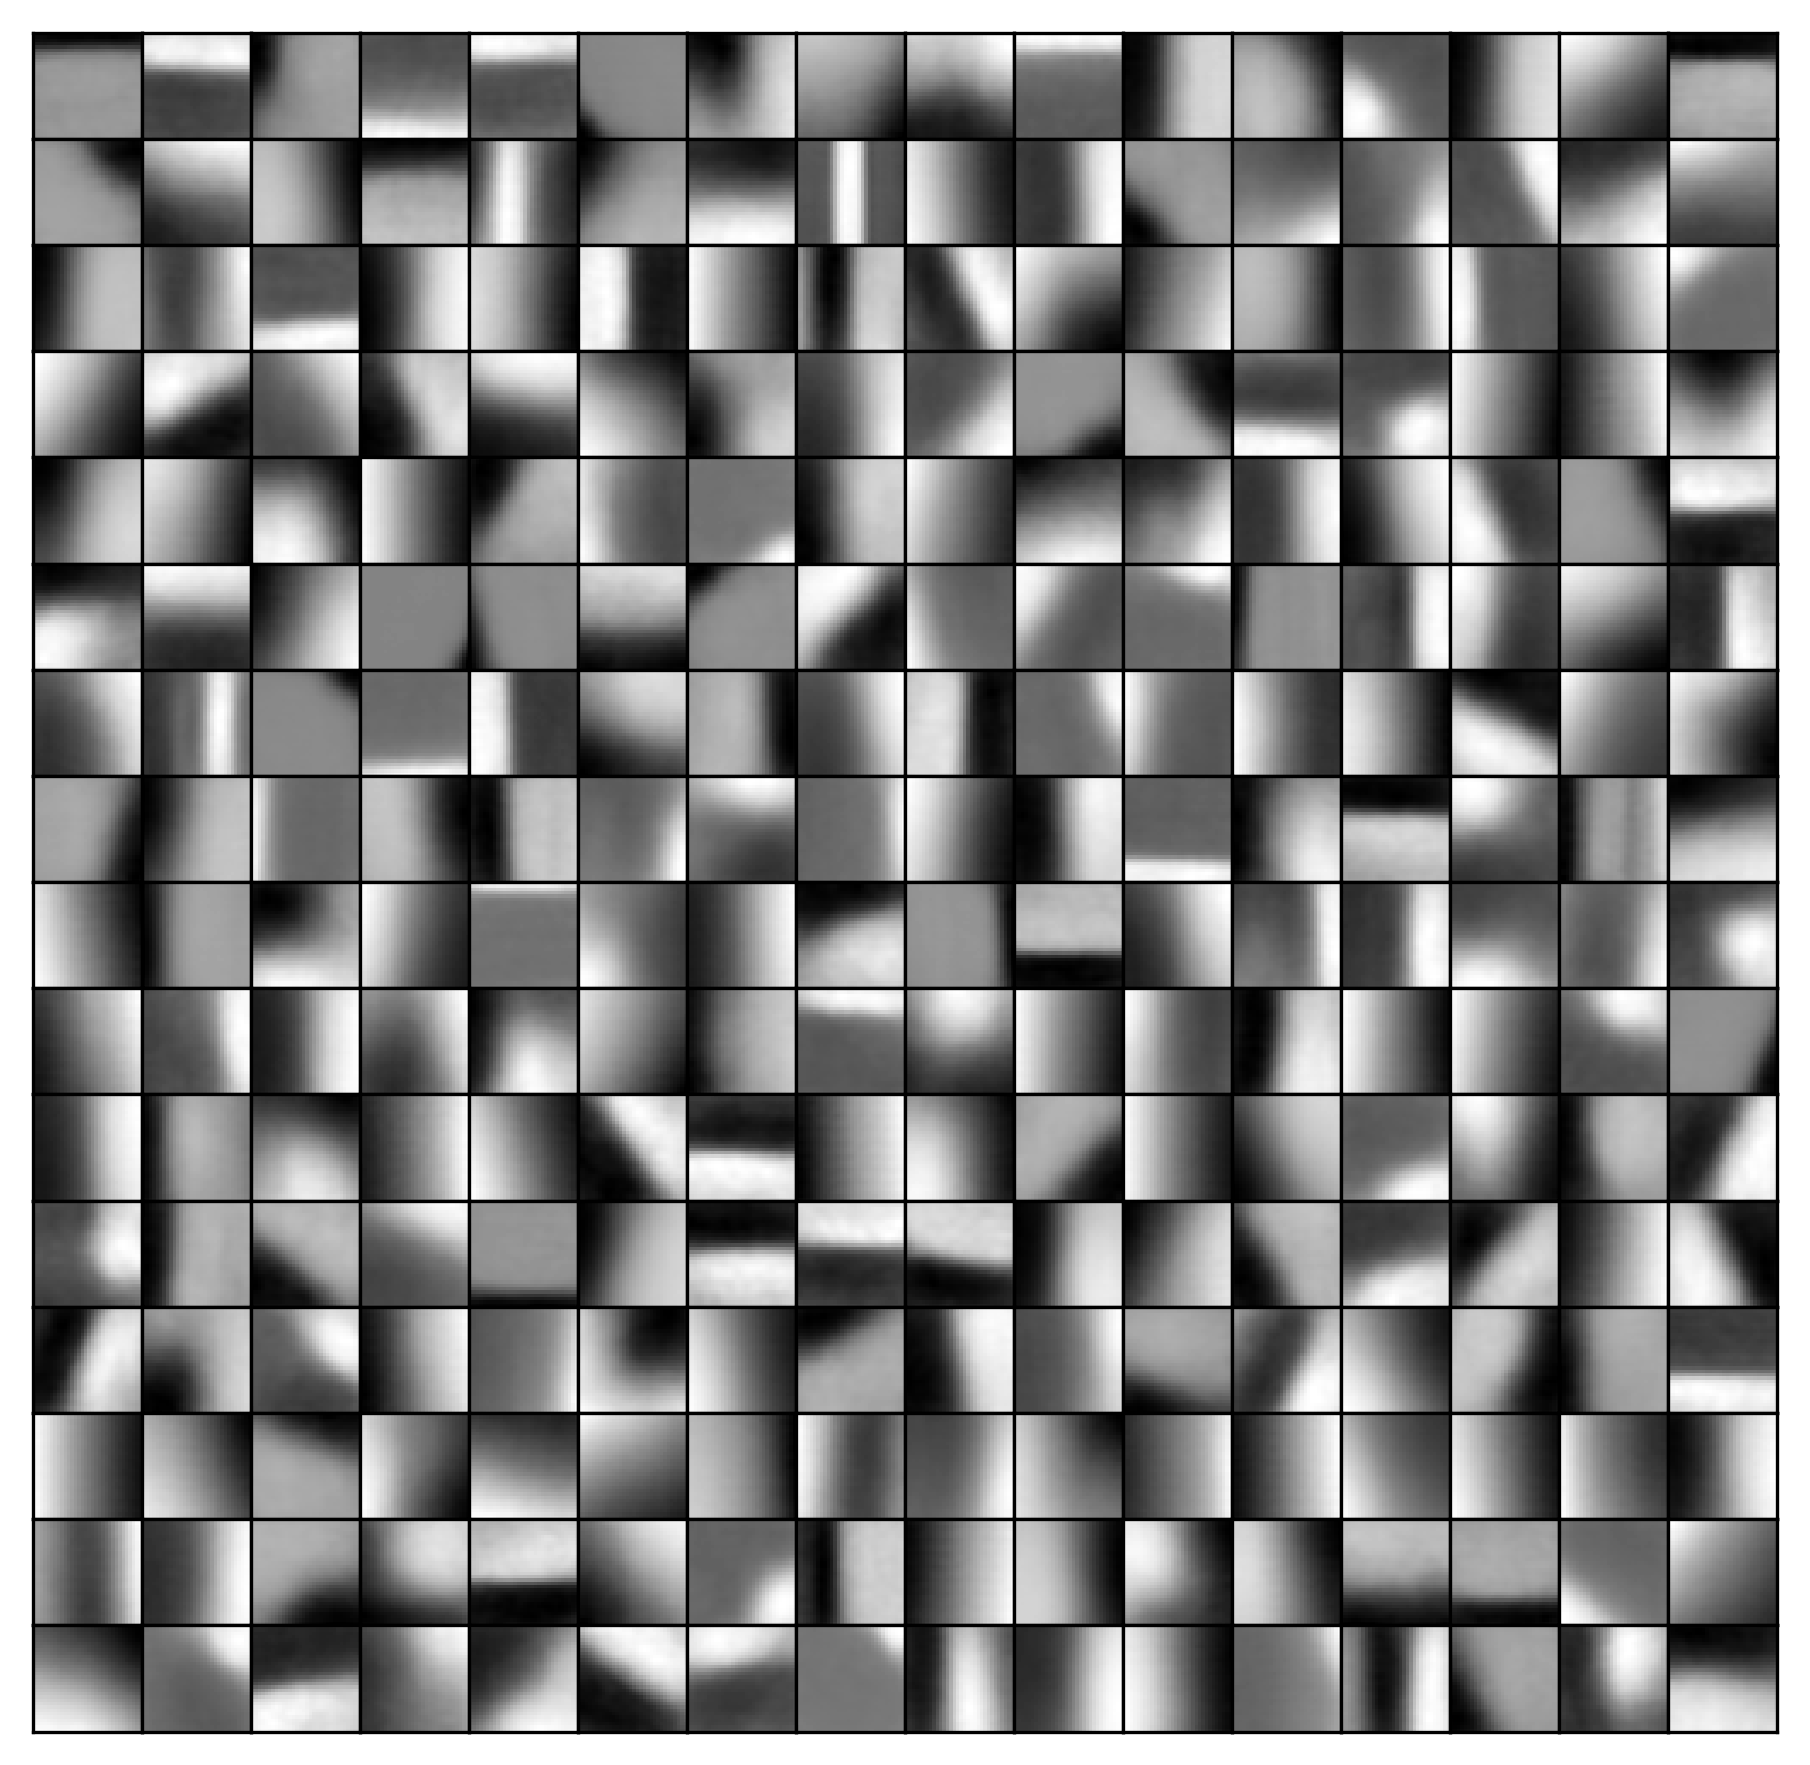

In [17]:
imnet.load(ims_winners[-1])
imnet.tiled_dict(cmap='gray', layout=[16,16], savestr='Figures/SAIL_unwhite_fulldict.png')

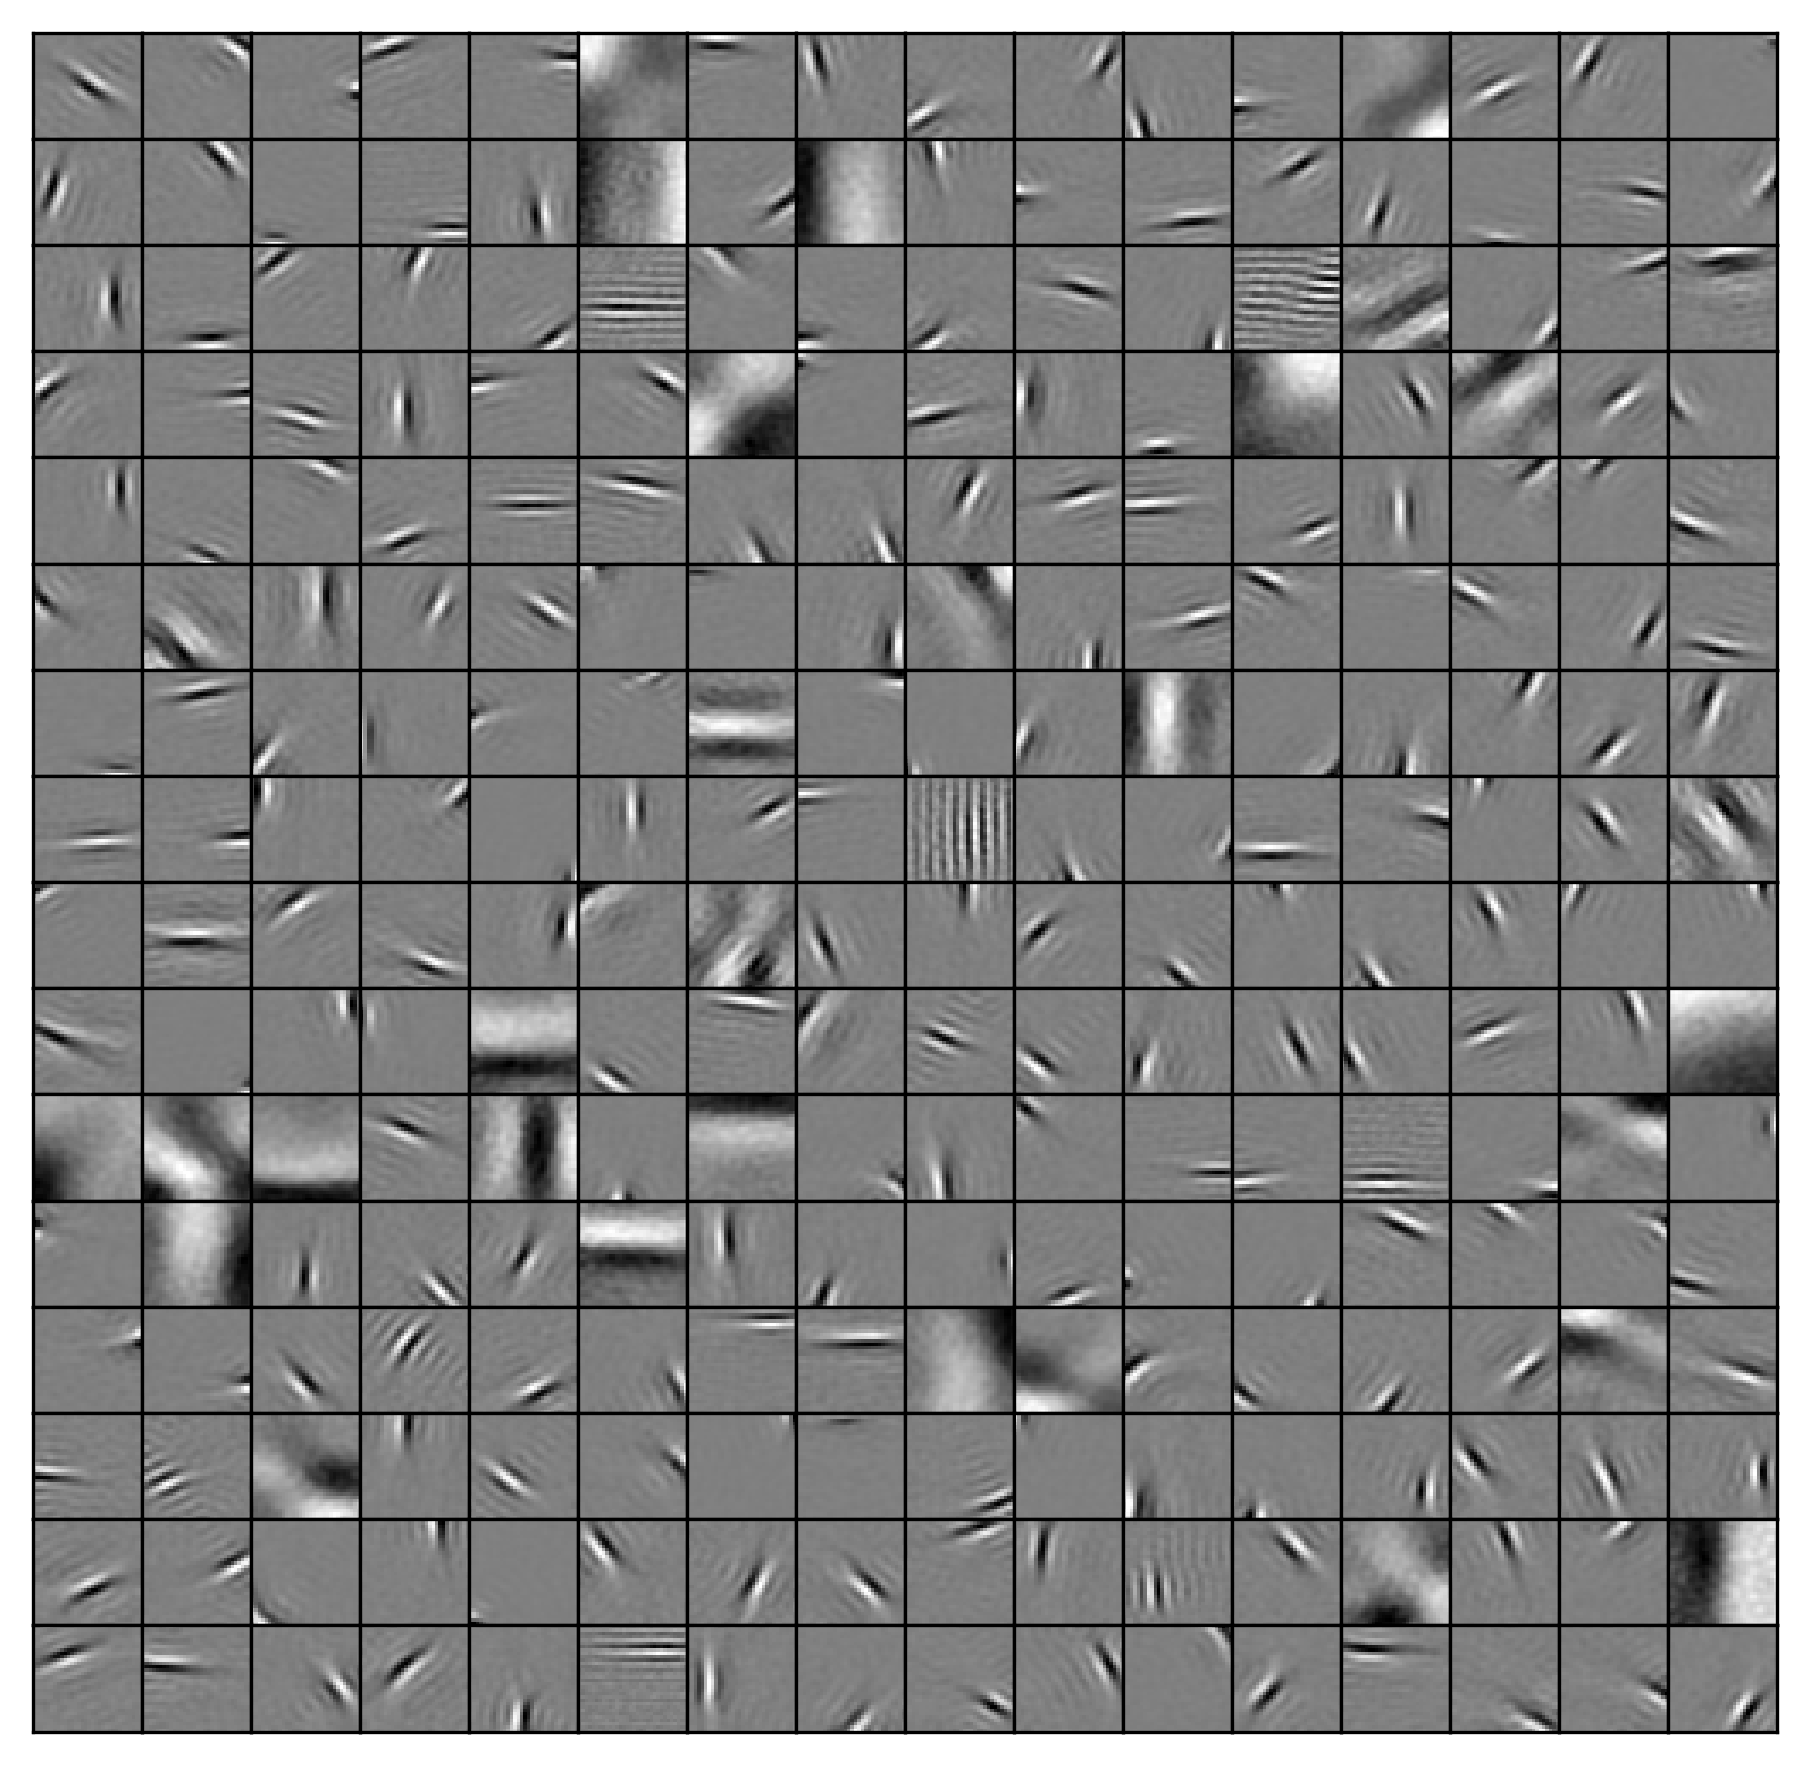

In [18]:
imlca.load('Pickles/conventional/completeLCA_unwhite2.pickle')
imlca.tiled_dict(cmap='gray', layout=[16,16], savestr='Figures/lca_unwhite_fulldict.png')